In [180]:
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
from numpy.fft import fft2, ifft2, fftshift, ifftshift  # 用於頻率域轉換

In [181]:
def basic_array_info(array: np.ndarray):
    print("Type: ", type(array))
    print("Shape: ", array.shape)
    print("Max: ", array.max())
    print("Min: ", array.min())
    print("Mean: ", array.mean())

# basic_array_info(f_transform)

In [221]:
import cv2
import matplotlib.pyplot as plt
import pathlib
import os

def save_plt_image(image, save_params):
    """
    使用Matplotlib保存圖像的函數。

    該函數接收一個圖像（通常是NumPy數組）並根據給定的保存參數將其保存為文件。

    Args:
        image (ndarray): 要保存的圖像數據。
        save_params (dict): 保存參數的字典，包含以下鍵值對：
            'folder_path' (str): 要保存圖像的文件夾路徑（默認為當前目錄）。
            'name' (str): 保存的圖像文件名（默認為'image.jpg'）。
            'cmap' (str): 顏色映射，用於顯示圖像（默認為'gray'灰度圖像）。
            'figsize' (tuple): 圖像保存時的尺寸（以英寸為單位，默認為(10, 10)）。
            'bbox_inches' (str or None): 保存時的邊界框設置（默認為None，不設置邊界，通常使用'tight'來去除多餘邊框）。

    Example:
        save_params = {
            'folder_path': r"F:\Code\Digital-Image-Processing\Code\Resources\outputs",
            'name': 'image3.jpg',
            'cmap': 'gray',
            'figsize': (20, 20), 
            'bbox_inches': 'tight'
        }
        save_plt_image(image, save_params)
    """
    
    # 確保所有必要的保存參數都存在
    
    folder = pathlib.Path(save_params.get('folder_path', '.'))
    
    folder.mkdir(parents=True, exist_ok=True)  # 確保目錄存在
    
    name = save_params.get('name', 'image.jpg')


    path = folder / name
    cmap = save_params.get('cmap', 'gray')
    figsize = save_params.get('figsize', (10, 10))
    bbox_inches = save_params.get('bbox_inches', None)
    
    # 設置圖像的尺寸
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # 隱藏坐標軸
    
    # 保存圖像
    plt.savefig(path, bbox_inches=bbox_inches)
    plt.close()  # 關閉圖像窗口，釋放內存
    print(f"Image saved at {path}")

In [218]:
folder_path = pathlib.Path(r"F:\Code\Digital-Image-Processing\Code\Resources\template")
folder_path.as_posix()

'F:/Code/Digital-Image-Processing/Code/Resources/template'

In [222]:
# 讀取圖片，使用灰階模式
origin = cv2.imread(r'F:\Code\Digital-Image-Processing\Code\Resources\Private_Data\line_light_ok_6cm.tif', cv2.IMREAD_GRAYSCALE)

save_params = {
            'folder_path': folder_path,
            'name': 'origin.jpg',
            'bbox_inches': 'tight'
        }
save_plt_image(origin, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\template\origin.jpg


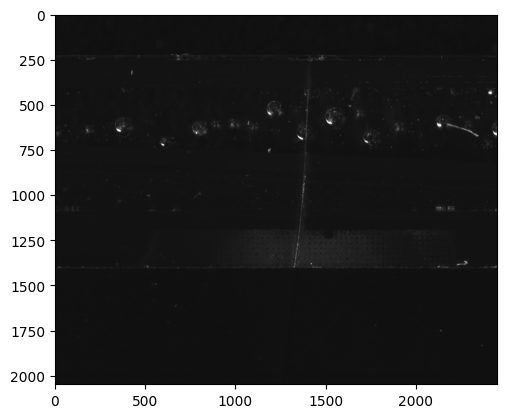

In [185]:
plt.imshow(origin, cmap="gray")

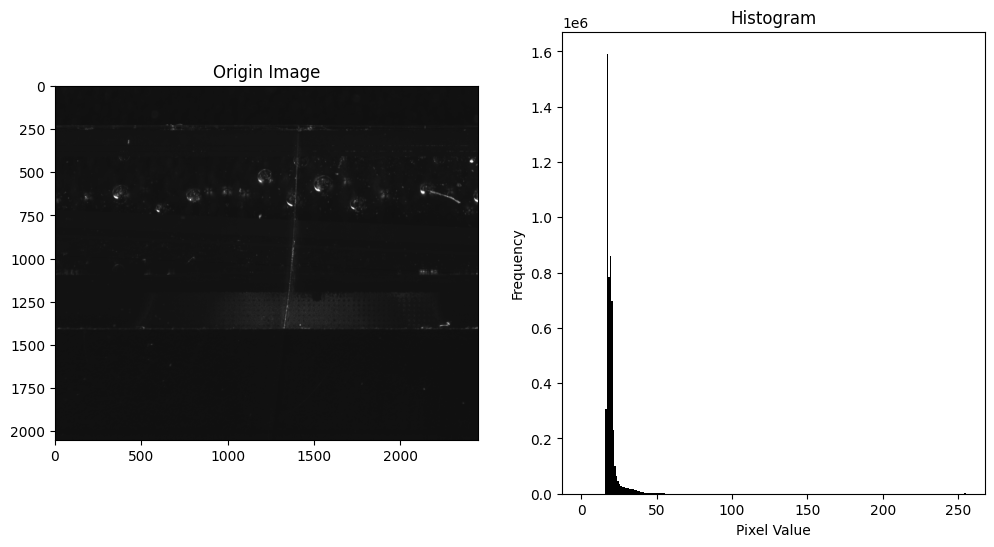

In [186]:
def histogram_show(image, title):
    """顯示圖片的直方圖"""
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    # plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()


# 顯示原圖與其直方圖
histogram_show(origin, title='Origin Image')



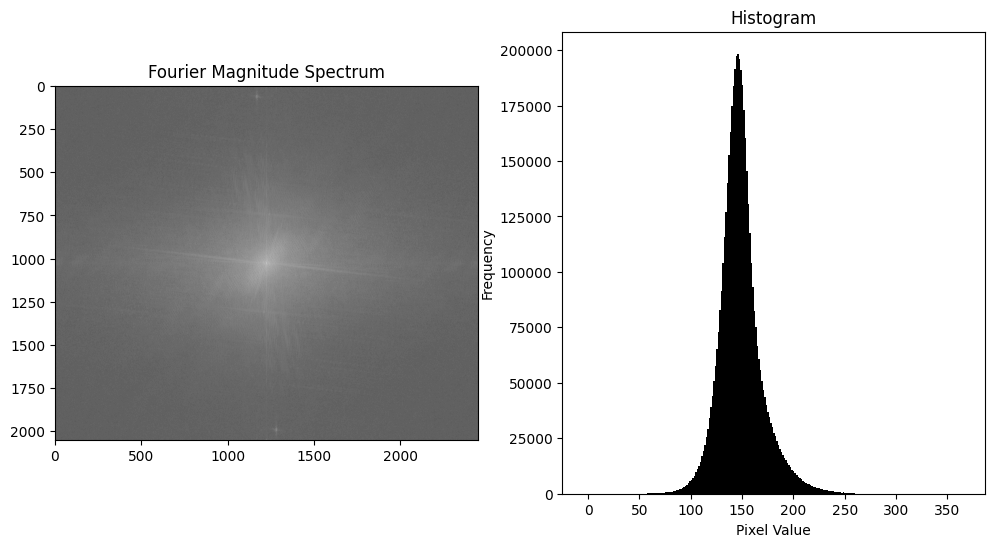

In [187]:
def fourier_show(image):
    """計算並顯示傅立葉頻譜和直方圖"""
    f_transform = fft2(image)  # 進行2D快速傅立葉變換
    f_transform_shifted = fftshift(f_transform)  # 移動零頻率成分到中心
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))  # 計算頻譜的幅度
    
    histogram_show(magnitude_spectrum, title='Fourier Magnitude Spectrum')
    
    return f_transform_shifted, magnitude_spectrum

def i_fourier_show(f_transform_shifted):
    """進行逆傅立葉變換並顯示重建的圖片"""
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))
    
    f_transform_ishift = ifftshift(f_transform_shifted)  # 將零頻率成分移回原來位置
    image_back = ifft2(f_transform_ishift)  # 進行2D逆快速傅立葉變換
    image_back = np.abs(image_back)  # 取實部，得到重建圖像

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Fourier Magnitude Spectrum")
    
    plt.subplot(1, 2, 2)
    plt.imshow(image_back, cmap='gray')
    plt.title('Reconstructed Image')
    # plt.axis('off')
    plt.show()
    
    return image_back

# 計算傅立葉變換，顯示頻譜及其直方圖
f_image, f_magnitude_spectrum = fourier_show(origin)

# # 逆傅立葉變換，顯示重建圖像
# i_fourier_show(f_image)

In [188]:
save_params = {
    'folder_path': folder_path,
    'name': 'Fourier Magnitude Spectrum.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(f_magnitude_spectrum, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\Fourier Magnitude Spectrum.jpg


In [189]:
basic_array_info(f_image)

Type:  <class 'numpy.ndarray'>
Shape:  (2048, 2448)
Max:  (97794052+0j)
Min:  (-4898980.481967522-2793644.0677768765j)
Mean:  (7.175088410126502e-15+3.501193525370183e-14j)


In [190]:
image = origin

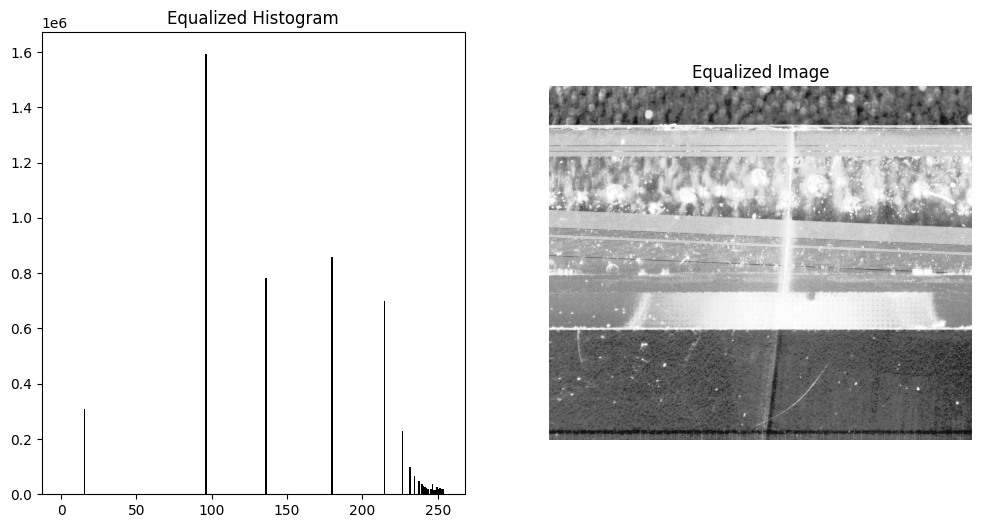

In [191]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_specification(image):
    # 計算原始圖像的直方圖
    original_hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # 計算累積直方圖
    cdf = original_hist.cumsum()
    cdf_normalized = cdf * original_hist.max() / cdf.max()  # 這一步是選擇性的，用來使CDF在顯示時更好看

    # 掩蔽CDF中的零值，避免在後續計算中出現問題
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

    # 使用累積直方圖來進行影像規範化
    image_equalized = cdf_final[image]

    # 顯示規範化後的直方圖和圖片
    plt.figure(figsize=(12, 6))
    
    # 均衡化後圖片的直方圖
    plt.subplot(1, 2, 1)
    plt.hist(image_equalized.ravel(), bins=256, color='black')
    plt.title('Equalized Histogram')
    
    # 均衡化後的圖片
    plt.subplot(1, 2, 2)
    plt.imshow(image_equalized, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()
    
    return image_equalized

# 讀取圖片，使用灰階模式
# origin = cv2.imread('F:\\Code\\Digital-Image-Processing\\Code\\Resources\\Data\\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 呼叫直方圖自動處理函數來顯示結果
hs = histogram_specification(image)


In [192]:
save_params = {
    'folder_path': folder_path,
    'name': 'Equalized Histogram.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(hs, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\Equalized Histogram.jpg


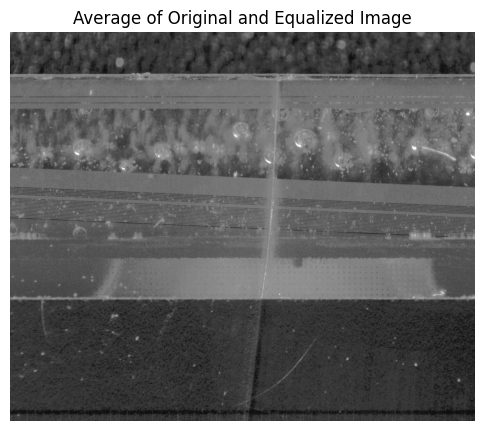

In [193]:
# 合併圖像
add_image = (origin.astype(float) + hs.astype(float)) / 2
add_image = np.clip(add_image, 0, 255).astype(np.uint8)  # 確保像素值在0到255之間

# 顯示合併後的圖像
plt.figure(figsize=(6, 6))
plt.imshow(add_image, cmap='gray')
plt.title('Average of Original and Equalized Image')
plt.axis('off')
plt.show()

In [194]:
# image = origin.copy()

# croped_image = image[:500, :]

# plt.imshow(croped_image, cmap='gray')
# plt.title('Croped Image')
# plt.axis('off')

# plt.show()

# origin = croped_image

## 門檻化

In [195]:
image = origin # origin add_image hs sobel_vertical sobel_horizontal laplacian_abs

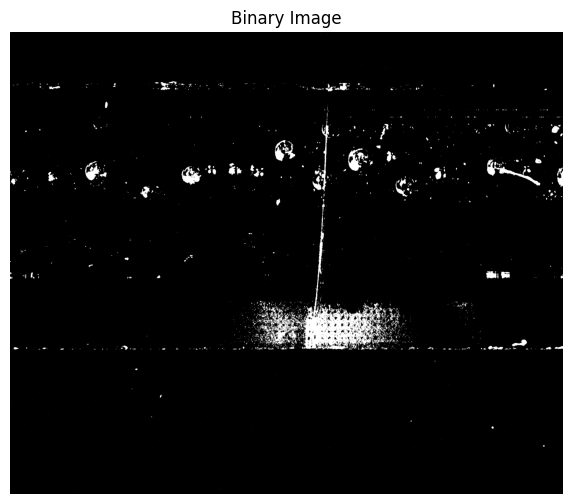

mean+std_dev*standard: 33.45355959930825, final thershold = 33


In [196]:
def image_binary(image, standard=2, print_image=True, print_threshold=False):
    mean = np.mean(image)
    std_dev = np.std(image)
    
    threshold_value = min(mean+std_dev*standard, 255) if mean+std_dev*standard >0 else 0
    threshold_value = int(threshold_value)
    
    # 根據門檻值進行二值化
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    if print_image:
    # 顯示二值化後的圖片
        plt.figure(figsize=(8, 6))
        plt.imshow(binary_image, cmap='gray')
        plt.title('Binary Image')
        plt.axis('off')
        plt.show()
    
    if not print_threshold:
        print(f"mean+std_dev*standard: {mean+std_dev*standard}, final thershold = {threshold_value}")
    
    return binary_image

binary_image = image_binary(image, standard=2, print_image=True, print_threshold=False)

In [197]:
save_params = {
    'folder_path': folder_path,
    'name': 'instant binary.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(binary_image, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\instant binary.jpg


In [198]:
image = origin

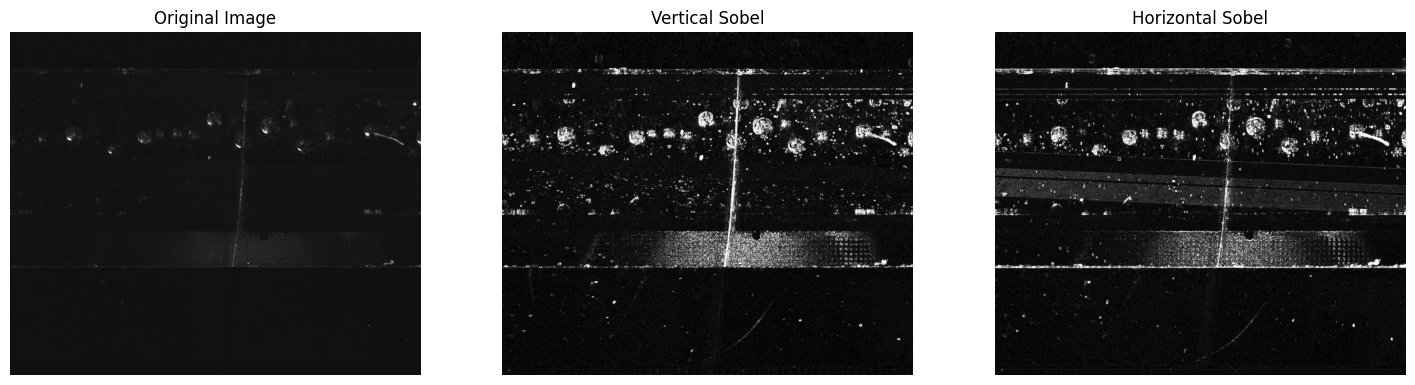

In [199]:
ksize = 5

# 應用垂直Sobel濾波
sobel_vertical = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)

# 轉換結果以便於顯示
sobel_vertical = np.abs(sobel_vertical)
sobel_vertical = np.uint8(np.clip(sobel_vertical, 0, 255))

# 應用水平Sobel濾波
sobel_horizontal = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)

# 轉換結果以便於顯示
sobel_horizontal = np.abs(sobel_horizontal)
sobel_horizontal = np.uint8(np.clip(sobel_horizontal, 0, 255))

# 顯示原始影像和Sobel垂直結果
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_vertical, cmap='gray')
plt.title('Vertical Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_horizontal, cmap='gray')
plt.title('Horizontal Sobel')
plt.axis('off')

plt.show()


In [200]:
save_params = {
    'folder_path': folder_path,
    'name': 'sobel_horizontal.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(sobel_horizontal, save_params)
save_params = {
    'folder_path': folder_path,
    'name': 'sobel_vertical.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(sobel_vertical, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\sobel_horizontal.jpg
Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\sobel_vertical.jpg


In [201]:
image = origin

mean+std_dev*standard: 33.45355959930825, final thershold = 33


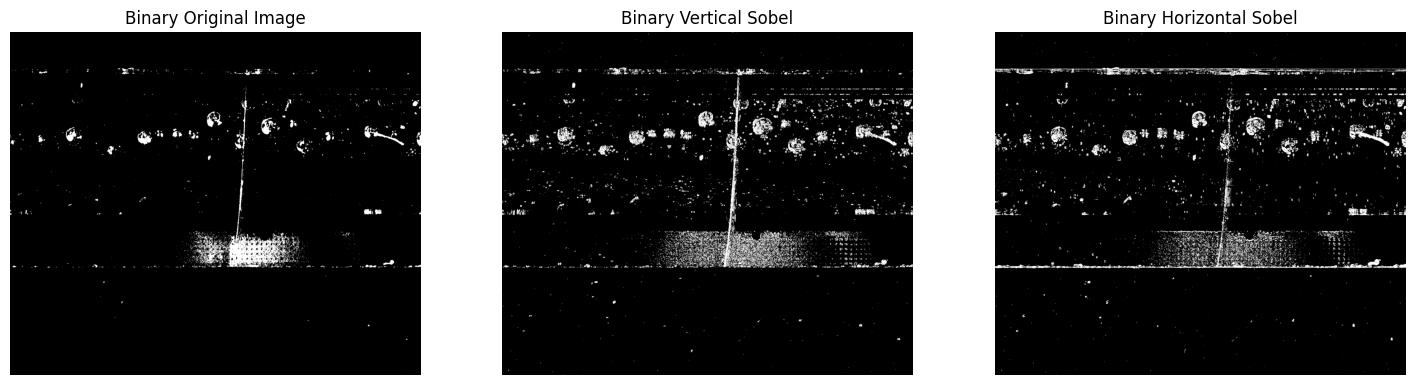

In [202]:
standard = 2

binary_image = image_binary(image, standard=standard, print_image=False)
binary_sobel_vertical = image_binary(sobel_vertical, standard=standard, print_image=False, print_threshold=True)
binary_sobel_horizontal = image_binary(sobel_horizontal, standard=standard, print_image=False, print_threshold=True)

# 顯示原始影像和Sobel垂直結果
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_sobel_vertical, cmap='gray')
plt.title('Binary Vertical Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_sobel_horizontal, cmap='gray')
plt.title('Binary Horizontal Sobel')
plt.axis('off')

plt.show()


In [203]:
save_params = {
    'folder_path': folder_path,
    'name': 'binary_sobel_vertical.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(binary_sobel_vertical, save_params)
save_params = {
    'folder_path': folder_path,
    'name': 'binary_sobel_horizontal.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(binary_sobel_horizontal, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\binary_sobel_vertical.jpg
Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\binary_sobel_horizontal.jpg


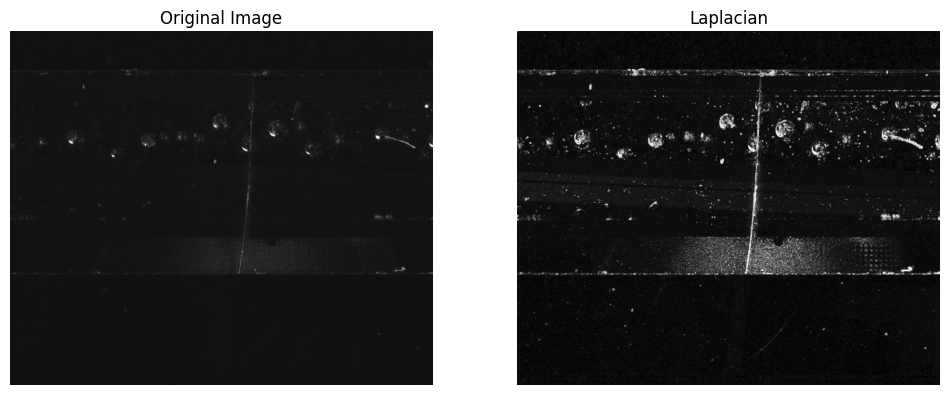

In [204]:
image = origin

# 應用拉普拉斯算子
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=5)  # 設置kernel size

# 將結果轉換為絕對值並縮放到8位
laplacian_abs = cv2.convertScaleAbs(laplacian)

# 顯示原始影像和拉普拉斯結果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.show()

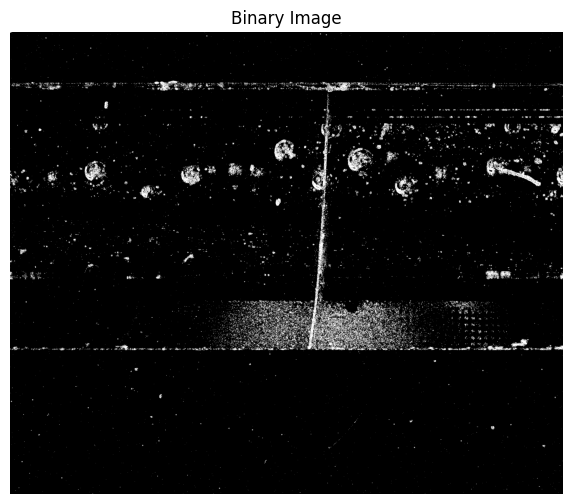

mean+std_dev*standard: 83.72792406188074, final thershold = 83


In [205]:
binary_laplacian_abs = image_binary(laplacian_abs)

In [206]:
save_params = {
    'folder_path': folder_path,
    'name': 'laplacian_abs.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(laplacian_abs, save_params)
save_params = {
    'folder_path': folder_path,
    'name': 'binary_laplacian_abs.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(binary_laplacian_abs, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\laplacian_abs.jpg
Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\binary_laplacian_abs.jpg


(-0.5, 2447.5, 2047.5, -0.5)

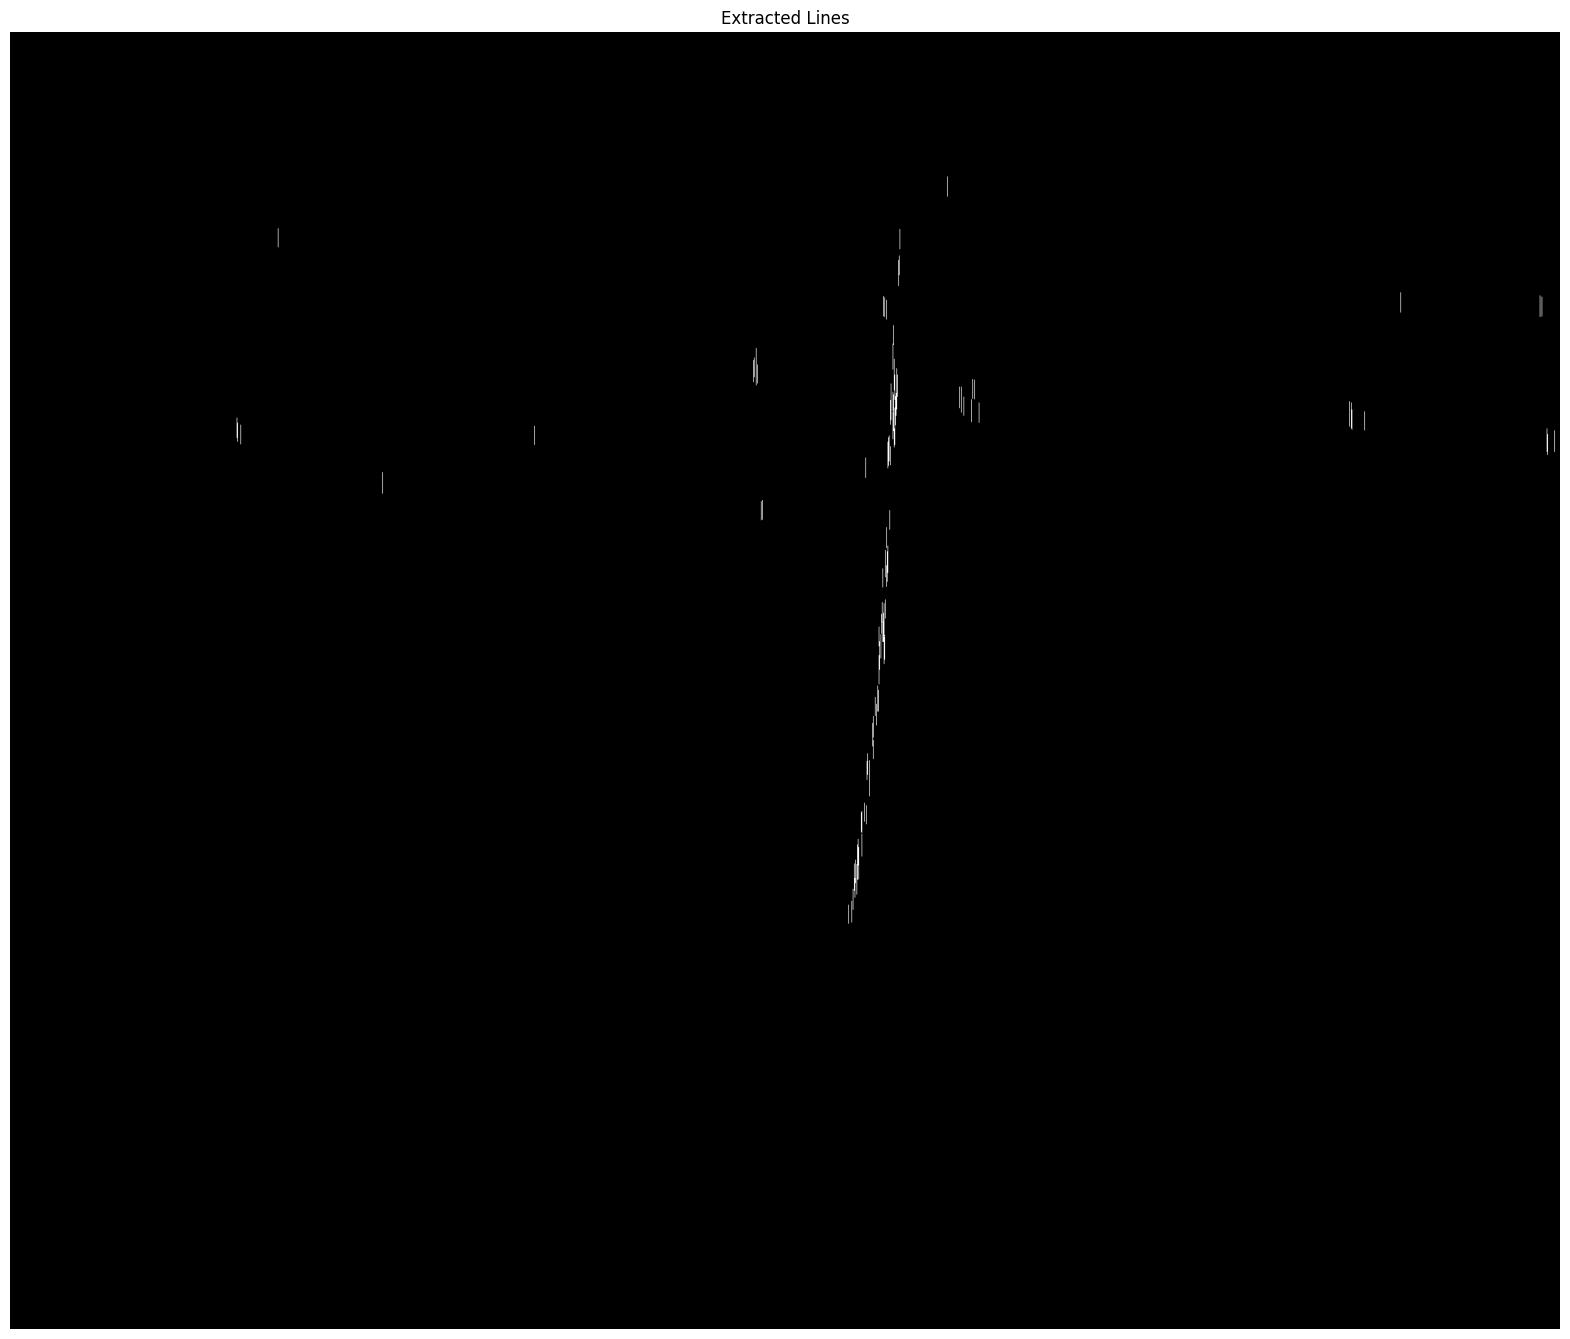

In [207]:
def get_lines(image, kernel_length=30):
    # 定義形態學操作的結構元素，這裡使用線形結構元素
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

    # 進行形態學操作以提取直線
    lines_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    return lines_image

# 使用範例
lines_image = get_lines(binary_laplacian_abs)

plt.figure(figsize=(20, 20))
plt.imshow(lines_image, cmap='gray')
plt.title('Extracted Lines')
plt.axis('off')

In [208]:
save_params = {
    'folder_path': folder_path,
    'name': 'lines_image.jpg',
    'cmap': 'gray',
    'bbox_inches': 'tight'
}
save_plt_image(lines_image, save_params)

Image saved at F:\Code\Digital-Image-Processing\Code\Resources\outputs\lines_image.jpg


In [209]:
np.unique(lines_image)

array([  0, 255], dtype=uint8)

In [210]:
unique_values = np.unique(lines_image)
print(unique_values)


[  0 255]


In [211]:
def create_blank(image):
    """創建一個空白圖像"""
    
    return np.zeros_like(image) # 單通道的空白圖像

In [212]:
# # 複製原始圖片和創建空白圖片
# image = origin.copy()
# blank_image = create_blank(origin)


# # 找到所有輪廓
# contours, _ = cv2.findContours(lines_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # 設置最小線長度
# min_line_length = 1000  # 根據需要調整

# # 過濾掉短線條
# for contour in contours:
#     if cv2.arcLength(contour, closed=False) > min_line_length:
#         cv2.drawContours(image, [contour], -1, (255), thickness=cv2.FILLED)
#         cv2.drawContours(blank_image, [contour], -1, (255), thickness=cv2   .FILLED)
    
# # 顯示結果
# plt.figure(figsize=(20, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Detected Lines on Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(blank_image, cmap='gray')
# plt.title('Detected Lines on Blank Image')
# plt.axis('off')

# plt.show()

In [213]:
from PIL import Image as PILImage
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

# 範例使用
image_path = "F:\\Code\\Digital-Image-Processing\\Code\\Resources\\outputs\\image.jpg"  # 確保路徑正確
text_content = """
This is a simple PDF report that includes both text and an image. 
You can customize this content to include more details about your data or analysis.
"""


def image_pdf_wh(image_path):
    # Step 1: 讀取圖片尺寸
    with PILImage.open(image_path) as img:
        img_width, img_height = img.size  # 圖片的寬度和高度（像素）

    # Step 2: 計算PDF中的顯示尺寸（例如，限制為4x3英寸）
    max_width_inch =7
    max_height_inch = 5

    # 計算圖片的寬高比例
    aspect_ratio = img_width / img_height

    # 計算顯示尺寸
    if img_width > img_height:
        display_width = min(max_width_inch, img_width / img_height * max_height_inch)
        display_height = display_width / aspect_ratio
    else:
        display_height = min(max_height_inch, img_height / img_width * max_width_inch)
        display_width = display_height * aspect_ratio

    return display_width, display_height


# Step 3: 創建PDF文檔
pdf_filename = "report.pdf"
doc = SimpleDocTemplate(pdf_filename, pagesize=A4)
story = []

# Step 4: 添加標題和說明文字
styles = getSampleStyleSheet()
story.append(Paragraph("報告標題", styles['Title']))
story.append(Spacer(1, 12))

story.append(Paragraph(text_content, styles['BodyText']))
story.append(Spacer(1, 12))

# Step 5: 添加圖片到PDF
display_width, display_height = image_pdf_wh(image_path)
image = Image(image_path, display_width * inch, display_height * inch)
story.append(image)
story.append(Spacer(1, 12))

# Step 6: 保存PDF文檔
doc.build(story)

print(f"PDF報告已生成：{pdf_filename}")


PDF報告已生成：report.pdf


In [214]:
from PIL import Image as PILImage
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics

class PDFReport:
    def __init__(self, name, fonts=None) -> None:
        self.pdf_name = name
        self.story = []
        self.doc = SimpleDocTemplate(self.pdf_name, pagesize=A4)
        self.styles = getSampleStyleSheet()  # 定義樣式表
        
        if fonts:
            self.font_create(fonts)
        else:
            self.fonts = [self.styles['BodyText']]  # 使用默認字體

    def image_pdf_wh(self, image_path):
        with PILImage.open(image_path) as img:
            img_width, img_height = img.size  # 圖片的寬度和高度（像素）

        max_width_inch = 7
        max_height_inch = 4
        
        aspect_ratio = img_width / img_height

        if img_width > img_height:
            display_width = min(max_width_inch, img_width / img_height * max_height_inch)
            display_height = display_width / aspect_ratio
        else:
            display_height = min(max_height_inch, img_height / img_width * max_width_inch)
            display_width = display_height * aspect_ratio

        return display_width, display_height
    
    def add_image(self, image_path):
        display_width, display_height = self.image_pdf_wh(image_path)
        img = Image(image_path, display_width * inch, display_height * inch)
        self.story.append(img)
        self.story.append(Spacer(1, 12))
    
    def add_title(self, title, font=0):
        self.story.append(Paragraph(title, self.fonts[font]))
        self.story.append(Spacer(1, 12))
    
    def add_content(self, text_content, font=0):
        self.story.append(Paragraph(text_content, self.fonts[font]))
        self.story.append(Spacer(1, 12))
    
    def font_create(self, fonts):
        self.fonts = []
        for i in range(len(fonts)):
            fontname = f'font{i}'
            pdfmetrics.registerFont(TTFont(fontname, fonts[i]))
            style = ParagraphStyle(
                name=fontname,
                fontName=fontname,
                parent=self.styles["Normal"],  # 正確設置parent屬性
            )
            self.fonts.append(style)
            
    def create(self):
        self.doc.build(self.story)
        print(f"PDF報告已生成：{self.pdf_name}")

fonts = [r"F:\Code\Digital-Image-Processing\Code\Resources\Fonts\Times New Roman.ttf", r"F:\Code\Digital-Image-Processing\Code\Resources\Fonts\kaiu.ttf"]

# # 使用範例
# titles = ["This is 標題", "圖片"]
# image_paths = [r"F:\Code\Digital-Image-Processing\Code\Resources\outputs\image.jpg", r"F:\Code\Digital-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg"]
# text_contents = [
#     """
#     This is a simple PDF report that includes both text and an image. 
#     You can customize this content to include more details about your data or analysis.
#     """,
#     """
#     This is another image and text section.
#     You can also add more details here about the image or the data.
#     """
# ]

# report = PDFReport(name="report.pdf", fonts=fonts)

# report.add_title(titles[0], font=1)
# report.add_content(text_contents[0])
# report.add_image(image_paths[0])
# report.add_content(text_contents[1])
# report.add_title(titles[1], font=1)
# report.add_image(image_paths[1])
# report.create()


In [215]:
import os
os.listdir(r"F:\Code\Digital-Image-Processing\Code\Resources\outputs")

['animation.gif',
 'animation.mp4',
 'binary_laplacian_abs.jpg',
 'binary_sobel_horizontal.jpg',
 'binary_sobel_vertical.jpg',
 'Equalized Histogram.jpg',
 'Fourier Magnitude Spectrum.jpg',
 'image.jpg',
 'image2.jpg',
 'image3.jpg',
 'instant binary.jpg',
 'laplacian_abs.jpg',
 'lines_image.jpg',
 'origin.jpg',
 'sobel_horizontal.jpg',
 'sobel_vertical.jpg']

In [217]:
report = PDFReport(name="report.pdf", fonts=fonts)

contents = [
    {'type':'title', 'add': 'AOI Report', 'font':0},
    {'type':'content', 'add': '原圖', 'font':1},
    {'type':'image', 'add': (folder_path / 'origin.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': '傅立葉變換後頻率域圖', 'font':1},
    {'type':'image', 'add': (folder_path / 'Fourier Magnitude Spectrum.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': '標準化圖', 'font':1},
    {'type':'image', 'add': (folder_path / 'Equalized Histogram.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': 'instant binary, 兩倍標準差', 'font':1},
    {'type':'image', 'add': (folder_path / 'sobel_vertical.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': '垂直Sobel', 'font':1},
    {'type':'image', 'add': (folder_path / 'sobel_horizontal.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': '水平Sobel', 'font':1},
    {'type':'image', 'add': (folder_path / 'origin.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': '二值化後垂直Sobel', 'font':1},
    {'type':'image', 'add': (folder_path / 'binary_sobel_vertical.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': '二值化後水平Sobel', 'font':1},
    {'type':'image', 'add': (folder_path / 'binary_sobel_horizontal.jpg').as_posix(), 'font':0},
    
    {'type':'content', 'add': '取線段後', 'font':1},
    {'type':'image', 'add': (folder_path / 'lines_image.jpg').as_posix(), 'font':0},
    ]

for content in contents:
    if content.get('type') == 'title':
        report.add_title(content.get('add'), font=content.get('font'))
    elif content.get('type') == 'content':
        report.add_content(content.get('add'), font=content.get('font'))
    elif content.get('type') == 'image':
        report.add_image(content.get('add'))
    
report.create()

PDF報告已生成：report.pdf
